In [ ]:
%pip install numpy
%pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Install and prepare dataset

In [ ]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
num_classes = 3
data = iris.data
targets = np.eye(num_classes)[iris.target]
dataset = [(data[i][None,...],targets[i]) for i in range(data.shape[0])]

from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(dataset, train_size=0.8, random_state=42)
print(f'Train: {len(train_dataset)} | Test: {len(test_dataset)}')

Train: 120 | Test: 30


In [ ]:
class NN:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate = 0.01):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        self.learning_rate = learning_rate
        # initialize weights 1
        self.W1 = np.random.randn(self.input_dim, self.hidden_dim)
        self.b1 = np.random.randn(1, self.hidden_dim)

        # initialize weights 2
        self.W2 = np.random.randn(self.hidden_dim, self.output_dim)
        self.b2 = np.random.randn(1, self.output_dim)

    def forward(self, X):
        self.t1 = X @ self.W1 + self.b1
        self.h1 = self.relu(self.t1)

        self.t2 = self.h1 @ self.W2 + self.b2
        self.pred = self.softmax(self.t2)
        return self.pred

    def backward(self, X, target, pred):
        
        dE_dt2 = pred - target
        dE_dW2 = self.h1.T @ dE_dt2
        dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)

        dE_dh1 = dE_dt2 @ self.W2.T
        dE_dt1 = dE_dh1 * self.relu_derivative(self.t1)
        dE_dW1 = X.T @ dE_dt1
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)

        self.W1 -= self.learning_rate*dE_dW1
        self.b1 -= self.learning_rate*dE_db1
        self.W2 -= self.learning_rate*dE_dW2
        self.b2 -= self.learning_rate*dE_db2


    def cross_entropy_loss(self, target, pred):
        return -np.sum(target*np.log(pred))

    def relu(self, t1):
        return np.maximum(0, t1)

    def softmax(self, X):
        out = np.exp(X)
        return out/np.sum(out, axis=1, keepdims=True)

    def relu_derivative(self, X):
        return (X>=0).astype(float)

# Train with batch

In [ ]:
np.random.shuffle(train_dataset)

In [ ]:
np.random.seed(42)
model = NN(4, 5, 3)
batch_size = 4
num_epoch = 101

for epoch in range(num_epoch):
    loss_train = []
    for i in range(len(train_dataset)//batch_size):
        batch_x, batch_y = zip(*train_dataset[i*batch_size:i*batch_size+batch_size])
        X = np.concatenate(batch_x,axis=0)
        target = np.array(batch_y)
        pred = model.forward(X)
        model.backward(X,target,pred)
        E = model.cross_entropy_loss(target, pred)
        loss_train.append(E)
    if epoch%10==0:
        print(f'Epoch: {epoch} | Error: {np.mean(loss_train)}')

def get_accuracy(dataset, model):
    acc = 0
    for X, target in dataset:
        pred = model.forward(X)
        if np.argmax(pred)==np.argmax(target):
            acc += 1
    return acc

acc_train = get_accuracy(train_dataset, model)
print(f'Accuracy Train: {np.round(acc_train/len(train_dataset)*100,2)}%')

acc_test = get_accuracy(test_dataset, model)
print(f'Accuracy Test: {np.round(acc_test/len(test_dataset)*100,2)}%')

Epoch: 0 | Error: 5.341233427747144
Epoch: 10 | Error: 1.2007186650514567
Epoch: 20 | Error: 0.7154426326163027
Epoch: 30 | Error: 0.6396737055946262
Epoch: 40 | Error: 0.5731940106308187
Epoch: 50 | Error: 0.5459609044385727
Epoch: 60 | Error: 0.5094902084562586
Epoch: 70 | Error: 0.5032012024314131
Epoch: 80 | Error: 0.4874380732563581
Epoch: 90 | Error: 0.476929993538312
Epoch: 100 | Error: 0.46349207883768445
Accuracy Train: 96.67%
Accuracy Test: 96.67%


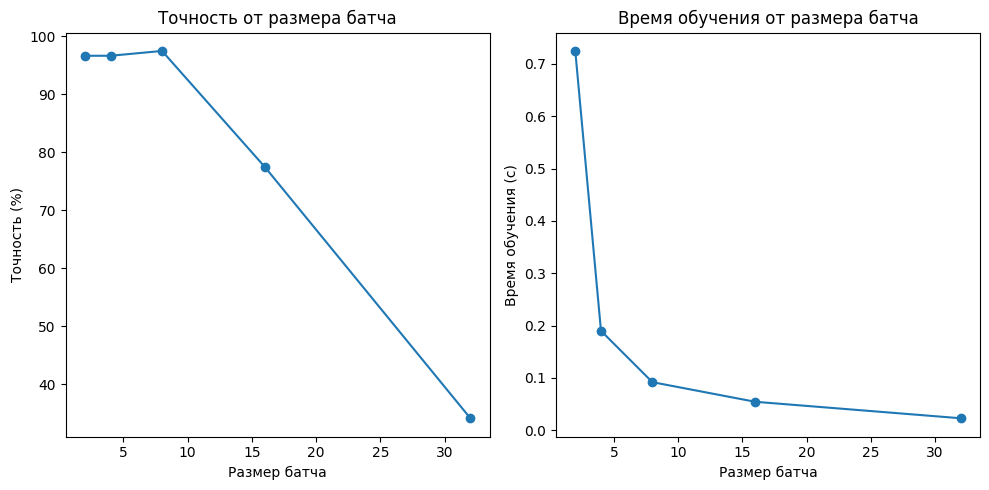

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Задаем случайное начальное значение для воспроизводимости результатов
np.random.seed(42)

# Определяем список размеров батчей для тестирования
batch_sizes = [2, 4, 8, 16, 32]

# Инициализируем списки для хранения точности и времени обучения
accuracies = []
training_times = []

for batch_size in batch_sizes:
    # Создаем новый экземпляр модели для каждого размера батча
    model = NN(4, 5, 3)

    num_epoch = 101
    loss_train = []

    # Запускаем таймер
    start_time = time.time()

    for epoch in range(num_epoch):
        for i in range(len(train_dataset)//batch_size):
            batch_x, batch_y = zip(*train_dataset[i*batch_size:i*batch_size+batch_size])
            X = np.concatenate(batch_x, axis=0)
            target = np.array(batch_y)
            pred = model.forward(X)
            model.backward(X, target, pred)
            E = model.cross_entropy_loss(target, pred)
            loss_train.append(E)

    # Рассчитываем время обучения
    end_time = time.time()
    training_time = end_time - start_time

    # Рассчитываем и сохраняем точность
    acc_train = get_accuracy(train_dataset, model)
    accuracies.append(acc_train/len(train_dataset)*100)

    # Сохраняем время обучения
    training_times.append(training_time)

# Строим графики зависимости точности и времени обучения от размера батча
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, accuracies, marker='o')
plt.xlabel('Размер батча')
plt.ylabel('Точность (%)')
plt.title('Точность от размера батча')

plt.subplot(1, 2, 2)
plt.plot(batch_sizes, training_times, marker='o')
plt.xlabel('Размер батча')
plt.ylabel('Время обучения (с)')
plt.title('Время обучения от размера батча')

plt.tight_layout()
plt.show()


# Install MNIST dataset

In [ ]:
# Install torch for Ubuntu
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torchvision
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, download=True)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 394684886.36it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 44948309.40it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 204062771.73it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 16903752.23it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# ДЗ №3

1) Построить графики зависимости точности (%) и времени обучения (с) от размера батча (batch_size)
2) Обучить модель на наборе данных MNIST
3) Все выполненные дз скидываем в следующем формате: "Фамилия_№ДЗ.ipynb"

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms

# Загрузка данных
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

mnist_train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=False)

# Определение модели
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Обучение модели
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}: loss {running_loss / 100:.3f}')
            running_loss = 0.0

print('Training finished.')

# Оценка модели на тестовом наборе данных
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1, Batch 100: loss 2.205
Epoch 1, Batch 200: loss 1.878
Epoch 1, Batch 300: loss 1.384
Epoch 1, Batch 400: loss 0.980
Epoch 1, Batch 500: loss 0.759
Epoch 1, Batch 600: loss 0.620
Epoch 1, Batch 700: loss 0.553
Epoch 1, Batch 800: loss 0.514
Epoch 1, Batch 900: loss 0.464
Epoch 2, Batch 100: loss 0.418
Epoch 2, Batch 200: loss 0.420
Epoch 2, Batch 300: loss 0.402
Epoch 2, Batch 400: loss 0.387
Epoch 2, Batch 500: loss 0.377
Epoch 2, Batch 600: loss 0.368
Epoch 2, Batch 700: loss 0.358
Epoch 2, Batch 800: loss 0.369
Epoch 2, Batch 900: loss 0.363
Epoch 3, Batch 100: loss 0.349
Epoch 3, Batch 200: loss 0.337
Epoch 3, Batch 300: loss 0.346
Epoch 3, Batch 400: loss 0.322
Epoch 3, Batch 500: loss 0.317
Epoch 3, Batch 600: loss 0.320
Epoch 3, Batch 700: loss 0.298
Epoch 3, Batch 800: loss 0.316
Epoch 3, Batch 900: loss 0.321
Epoch 4, Batch 100: loss 0.303
Epoch 4, Batch 200: loss 0.285
Epoch 4, Batch 300: loss 0.301
Epoch 4, Batch 400: loss 0.291
Epoch 4, Batch 500: loss 0.302
Epoch 4,

Predicted class: 1


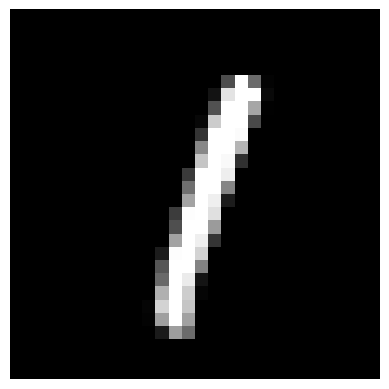

In [ ]:
import matplotlib.pyplot as plt

# Получение шестой картинки и метки из тестового набора данных
image, label = mnist_test[5]  # Получение шестой картинки и соответствующей метки
image = image.squeeze().numpy()  # Преобразование тензора в массив NumPy и удаление измерения пакета

# Преобразование картинки в тензор и получение прогноза модели
image_tensor = torch.from_numpy(image).unsqueeze(0).unsqueeze(0).float()  # Преобразование массива в тензор
with torch.no_grad():
    model.eval()
    output = model(image_tensor)
    _, predicted = torch.max(output, 1)

# Вывод прогноза модели и отображение изображения
predicted_class = predicted.item()
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']  # Список классов
print(f"Predicted class: {class_names[predicted_class]}")

# Отображение изображения
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
